# Data Mining Assignment 1

# Introduction

### Contextualising the problem

**Data mining** is a field that focuses on extracting insights and patterns from large datasets. That as of itself already constitutes a strong argument in favour of using such a process when tackling business problems, but there is still more to it.

In this analysis, we will approach the complex market of housing. Specifically, the one in California, which has been undergoing a significant shortage ever since the 70s, later resulting in various problems during the decade of 1990. This fact is relevant since it falls under the scope of this dataset.

Therefore, it is important to mention that this data is not particularly helpful at predicting current housing prices. Nonetheless, it serves as valuable ground for emulating the tackling of a panoply of issues at the time. Looking at a small example to illustrate the stress felt at that point regarding housing, over 465.000 families in California were placed on waiting lists for public housing, and such lists could go on for up to 8 years (Williams, 2000).

As such, this project proposes to answer the following problem statement:

**Given the highly stressed Californian housing market of the 90s, how can we accurately predict the median pricing of houses by utilising demographic, property, and geographical data - and what insights can the developed models provide to systematise and further advise real estate developers?**

### Expanding on the business objectives of the project (Business Understanding)

Firstly, it is important to understand what the median nature of our prediction variable means. The median house value tells us that 50% of houses in a given block are below that number, while 50% are above. This measure offers more robustness to outliers than the mean, which fits our premise, since we're dealing with a section of the population waiting on housing lists, and that likely cannot afford the most expensive houses anyway. Therefore, by focusing on the fact that in any predicted block, 50% of it is predicted to be priced below a given value, there is enough information here for real estate developers to take actionable decisions.
  
If a successful approach can be delivered, we propose the following solution:

Real estate developers may use the predicted median house values to plan new housing developments or repurpose existing ones. By using our model to predict the median housing value of a given block, developers would be able to assess which areas are likely to offer housing that is affordable for the families on waiting lists. Due to it being the median, there is a guarantee that 50% of the houses are predicted to fall below a given price, providing a clear indication for affordability in the area.

Additionally, real estate developers may adjust characteristics of their planned developments so to obtain new projected values, and possibly increasing the overall affordability of the block. This would increase their ability to serve those in need of housing assistance while maintaining profitability. This benefits not only toward alleviating housing stress for families on waiting lists, but also ensures that developers can contribute to a more balanced and accessible housing market.

`TODO` Add correct sample diagram
<div style="text-align: center;">
    <img src="https://i.imgur.com/my0ettW.jpeg" alt="CRISP-DM Process" style="width:720px;height:200px;">
</div>

Figure 1: Business Use Case Sample Diagram

As mentioned before, the data we use is from 1990. This, of course, means that it is not reflective of the current market, primarily due to data drift. Namely, today's data may not fit the same distribution of values as it did in the 90s. For example, the dollar value is not the same as it was back then and therefore cannot be used for an apples-to-apples comparison with today's values. The motivation behind this analysis is that if we find that the model is able to perform well on the old data, we could retrain the same model with up-to-date data from California, while keeping the same schema (avoiding schema-skew) - and potentially have the means to come up with a good prediction model even for today's market.

To be able to judge if the model is performing well enough, we must use some evaluation metric(s). For this, we will be using the `RMSE` as our primary metric. This is thanks to its balance between interpretability and accuracy. It allows for expression using the same units and penalises large errors which is important for high-stakes markets such as real estate where transactions are large. In addition, in order to obtain a clearer picture of how reliable our models are, we will be calculating the percentage of predictions that fall within the 95% confidence interval. This helps in assessing how often the predictions are within an acceptable range and whether the model can produce somewhat reliable results consistently.

### Data Mining Methodology 

The Cross-Industry Standard Process for Data Mining (CRISP-DM) Methodology was used to build the deliverable of the assignment (it is pictured below). It organizes the data mining project in six phases (Business Understanding, Data Understanding, Data preparation, Modeling, Evaluation and Deployment).

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/639px-CRISP-DM_Process_Diagram.png" alt="CRISP-DM Process" style="width:400px;height:400px;margin-top: 20px;">
</div>

Figure 2: CRISP-DM Process Diagram 

1. *Business Understanding*: This process involves understanding the project's objectives, defining the business problem, and determining the success criteria. This was already explored above. The primary objective here in both the business use cases discussed is to predict the house prices as close as possible to the actual price. As the 

2. *Data Understanding*: The dataset contains 20640 observations with 14 variables of median house prices for california districts derived from 1990 census. The dataset is collected from kaggle data repository. This section involves looking at the available data through methods such as exploratory data analysis (EDA) where we identify the quality of data and gain some initial insights with various plots.

3. *Data Preparation*: This is the most important  phase where we prepare and package the data for mining, and it involves cleaning, transforming, and preparing the data for modeling. Here we can deal with issues that we identified in the data understanding stage such as missing values, outliers and multicolinearity. Feature scaling using standardization or normalization can be done in this phase.

4. *Modelling*: In this phase we run multiple models by diviing the dataset to 2 parts namely test and training set. The training set will be used to train the models while the predictions will be made on test set to check the accuracy or `RMSE` in our case. We tune and develop two models: Linear regression and Random Forest regression.

5. *Evaluation*: The models will be evaluated based on the success criteria discussed in business objective i.e. to have as low `RMSE` values as possible. We would also evaluate using other metrics like `MAE`, `R^2` etc. Finally, the models will be compared with each other in terms of these metrics and finalise the best model out of both which satisfies both the data mining and business goals.

6. *Deployment*: This step is omitted.

# Data Understanding

### Importing modules

In [39]:
!pip install -r requirements.txt -q

In [40]:
import pandas as pd
import numpy as np

# Visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from geodatasets import get_path


# Machine Learning modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

### Importing data

In [41]:
# Import the housing data from a CSV file
df = pd.read_csv('California_Houses.csv')
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The columns are as follows, their names are pretty self-explanatory [Column details are from here](https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features):

1) Median House Value: Median house value for households within a block (measured in US Dollars) [$]
2) Median Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars) [10k$]
3) Median Age: Median age of a house within a block; a lower number is a newer building [years]
4) Total Rooms: Total number of rooms within a block
5) Total Bedrooms: Total number of bedrooms within a block
6) Population: Total number of people residing within a block
7) Households: Total number of households, a group of people residing within a home unit, for a block
8) Latitude: A measure of how far north a house is; a higher value is farther north [°]
9) Longitude: A measure of how far west a house is; a higher value is farther west [°]
10) Distance to coast: Distance to the nearest coast point [m]
11) Distance to Los Angeles: Distance to the centre of Los Angeles [m]
12) Distance to San Diego: Distance to the centre of San Diego [m]
13) Distance to San Jose: Distance to the centre of San Jose [m]
14) Distance to San Francisco: Distance to the centre of San Francisco [m]

In [42]:
# Display basic statistics
display(df.describe().transpose()) 

,count,mean,std,min,25%,50%,75%,max
Median_House_Value,20640.0,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,5.000010e+05
Median_Income,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,1.500010e+01
Median_Age,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,5.200000e+01
Tot_Rooms,20640.0,2635.763081,2181.615252,2.000000,1447.750000,2127.000000,3148.000000,3.932000e+04
Tot_Bedrooms,20640.0,537.898014,421.247906,1.000000,295.000000,435.000000,647.000000,6.445000e+03
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,3.568200e+04
Households,20640.0,499.539680,382.329753,1.000000,280.000000,409.000000,605.000000,6.082000e+03
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,4.195000e+01
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-1.143100e+02
Distance_to_coast,20640.0,40509.264883,49140.039160,120.676447,9079.756762,20522.019101,49830.414479,3.338047e+05


We can observe that we have 20000+ rows, meaning that we likely have enough data to draw conclusions from, given the context.

Additionally, we are dealing with only numerical or integer (Tot_Rooms & Tot_Bedrooms) variables.


In [43]:
# Rename Distance_to_LA column to Distance_to_LosAngeles for consistent naming standard
df.rename(columns={'Distance_to_LA':'Distance_to_LosAngeles'}, inplace=True) 

# Check for missing values
print(df.isna().sum())

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LosAngeles      0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64


There are no missing values in the data set, therefore there is no need to replace values or remove any rows.

In [44]:
# Create list of geographical related column names
columns_geographical = df.columns[df.columns.str.contains('Distance|Latitude|Longitude')]
columns_geographical

Index(['Latitude', 'Longitude', 'Distance_to_coast', 'Distance_to_LosAngeles',
       'Distance_to_SanDiego', 'Distance_to_SanJose',
       'Distance_to_SanFrancisco'],
      dtype='object')

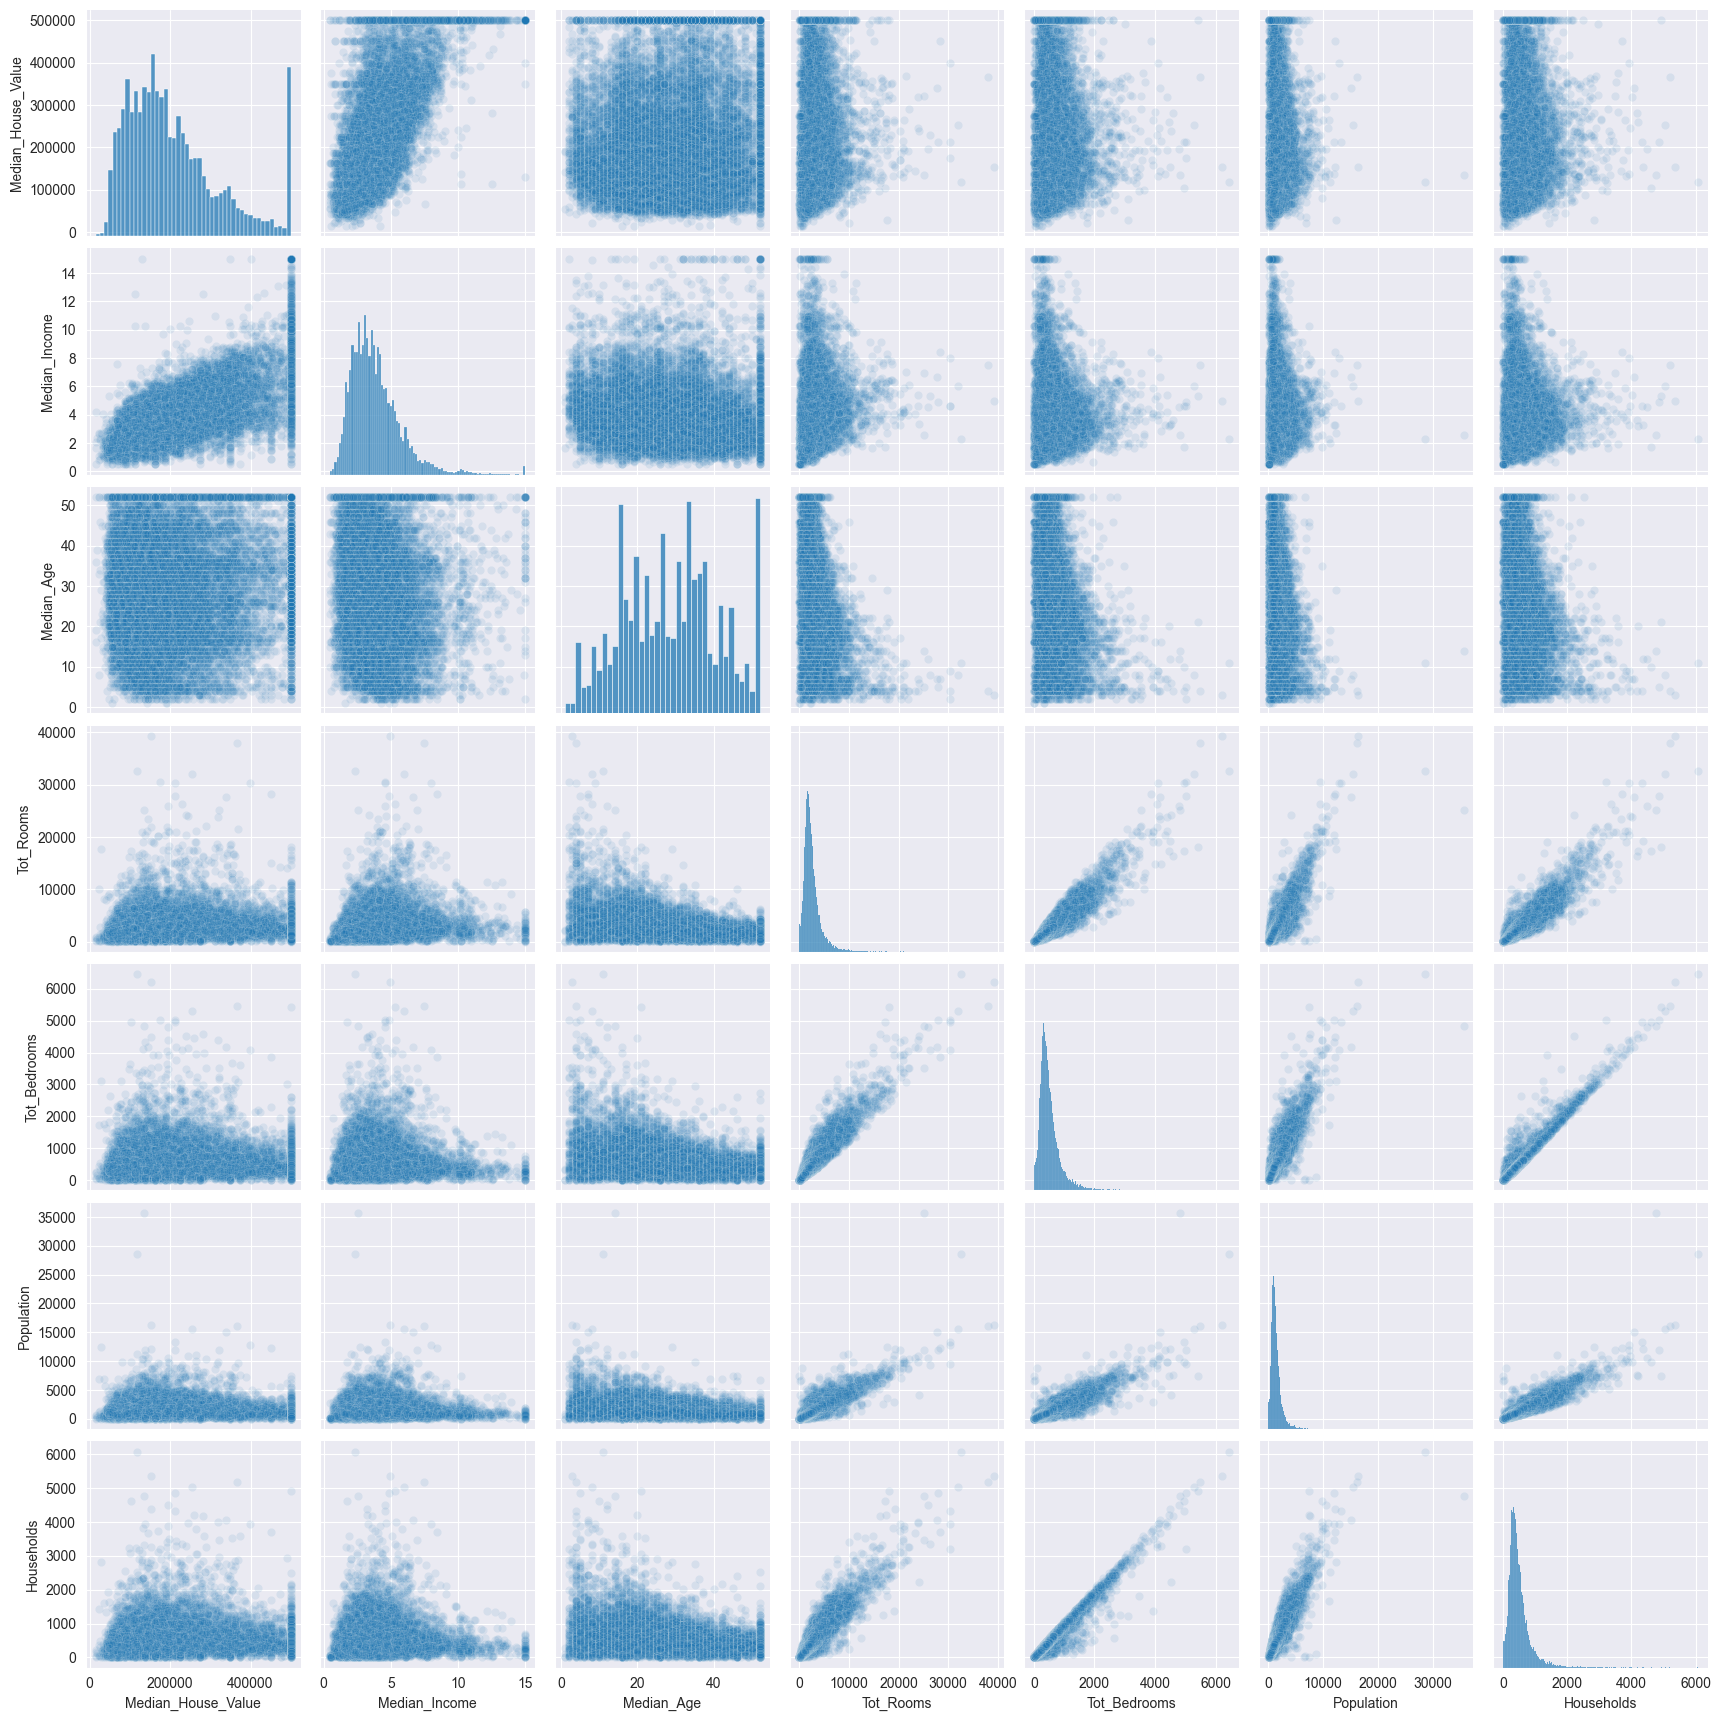

In [45]:
# Pairplot for columns w/o distance
sns.pairplot(df.drop(columns=columns_geographical), plot_kws={'alpha':0.1})  # Set opacity to 10%
plt.show()

By generating pairplots, we can observe the relationships between variables. It is a useful starting point to guide our analysis further. We can already tell that there is a strong correlation between `Tot_Bedrooms`, `Tot_Rooms`, `Households` and `Population`. This may suggest multicollinearity, but more on this later.

The reason for not plotting geographical data has to do with both looking to avoid clustering and the fact that we decided to analyse them in a different way.

### Checking distribution

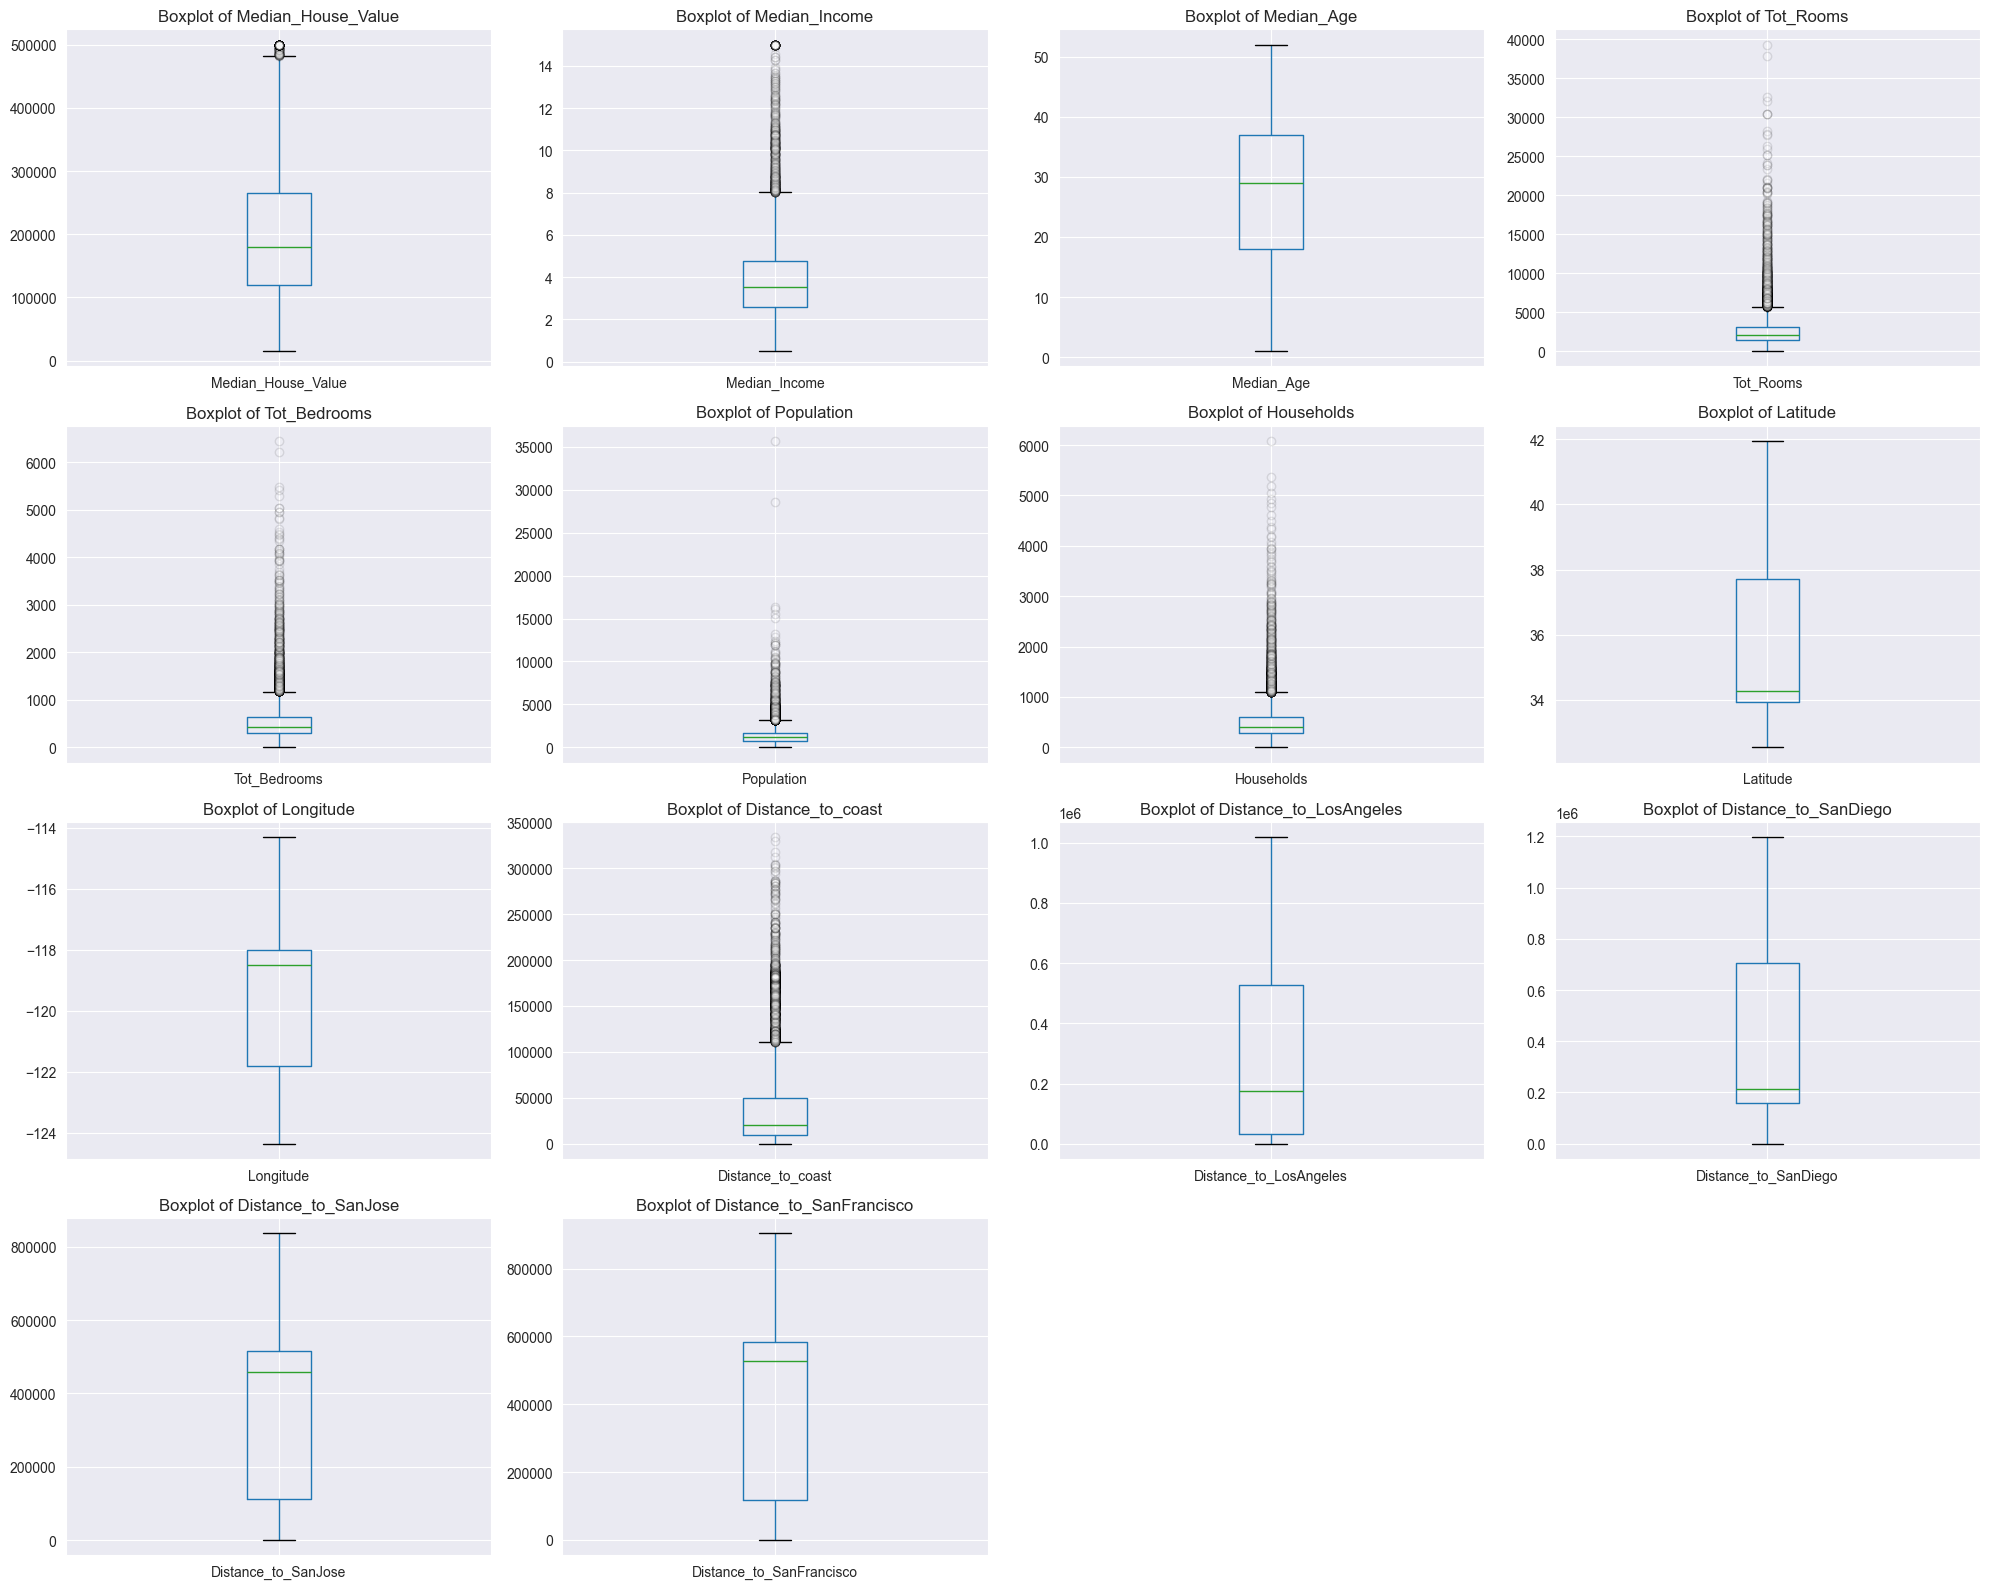

In [46]:
def boxplots():
    cols_per_row = 4
    num_rows = int(np.ceil(len(df.columns) / cols_per_row))
    fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(cols_per_row * 5, num_rows * 4))
    axes = axes.flatten()
    flierprops = dict(marker='o', markerfacecolor='white', markersize=6, linestyle='none', alpha=0.1)  # Set opacity to 10%

    for index, column in enumerate(df.columns):
        ax = axes[index]
        df.boxplot(column=column, ax=ax, vert=True, flierprops=flierprops)
        ax.set_title(f'Boxplot of {column}')

    for j in range(index + 1, len(axes)):
        fig.delaxes(axes[j]) 
               
    plt.tight_layout()
    plt.show()

boxplots()

## Explanation of outliers
- Median_income & Median_House_Value 
    - You can see that the circle that is highest, is colored really thick. This means there are many values with the maximum income and house value. Which is by default not possible, and means that there is a cap. Therefore, it is likely that all incomes that are higher than X dollar, are aggregated by X. 

All other outliers do not appear to be capped at any specific number.
        

### Median income & median house value explanation
As you can see from the sorted list below, there are 49 households with an income of 15,000.1. This cannot be a coincidence, so the income must be capped at 15,000.1.

Additionally, there are 965 houses with the maximum value of 500,001 dollar in the dataframe. This is also not a coincidence, meaning house values must be capped as well. Furthermore, there are 27 houses priced exactly at 500,000 dollar. The gap between the third most expensive house and the highest and second-highest house values is very small, indicating an artificial cap on prices.

In [47]:
df.groupby("Median_Income").count().sort_values(by="Median_Income", ascending=False)["Median_House_Value"].rename("Count of rows")

Median_Income
15.0001    49
15.0000     2
14.9009     1
14.5833     1
14.4219     1
           ..
0.6775      1
0.6433      1
0.5495      1
0.5360     10
0.4999     12
Name: Count of rows, Length: 12928, dtype: int64

In [48]:
df.groupby("Median_House_Value").count().sort_values(by="Median_House_Value", ascending=False)["Median_Income"].rename("Count of rows")

Median_House_Value
500001.0    965
500000.0     27
499100.0      1
499000.0      1
498800.0      1
           ... 
26600.0       1
25000.0       1
22500.0       4
17500.0       1
14999.0       4
Name: Count of rows, Length: 3842, dtype: int64

Given this fact, we decided to remove these values, as they can lead to problems with the model due to the fact that there is this artificial cap on these values. While this does mean that our model would not be able to capture the true value of the properties, this is a result of faulty data. As such, we are able then to say that our model can predict the house price up until $500.000 in value.  

This dataset is thus better catered to more affordable housing projects, rather than luxury ones. This goes in accordance with our premise, in which many families on those waiting lists were likely looking for housing blocks in which the median evaluation should not surpass $500.000.

In [49]:
# Remove rows where Median_House_Value is 500001.0 or Median_Income is 15.0001
df = df[(df["Median_House_Value"] != 500001.0) & (df["Median_Income"] != 15.0001)]

### Visualizing the distribution of the numerical values

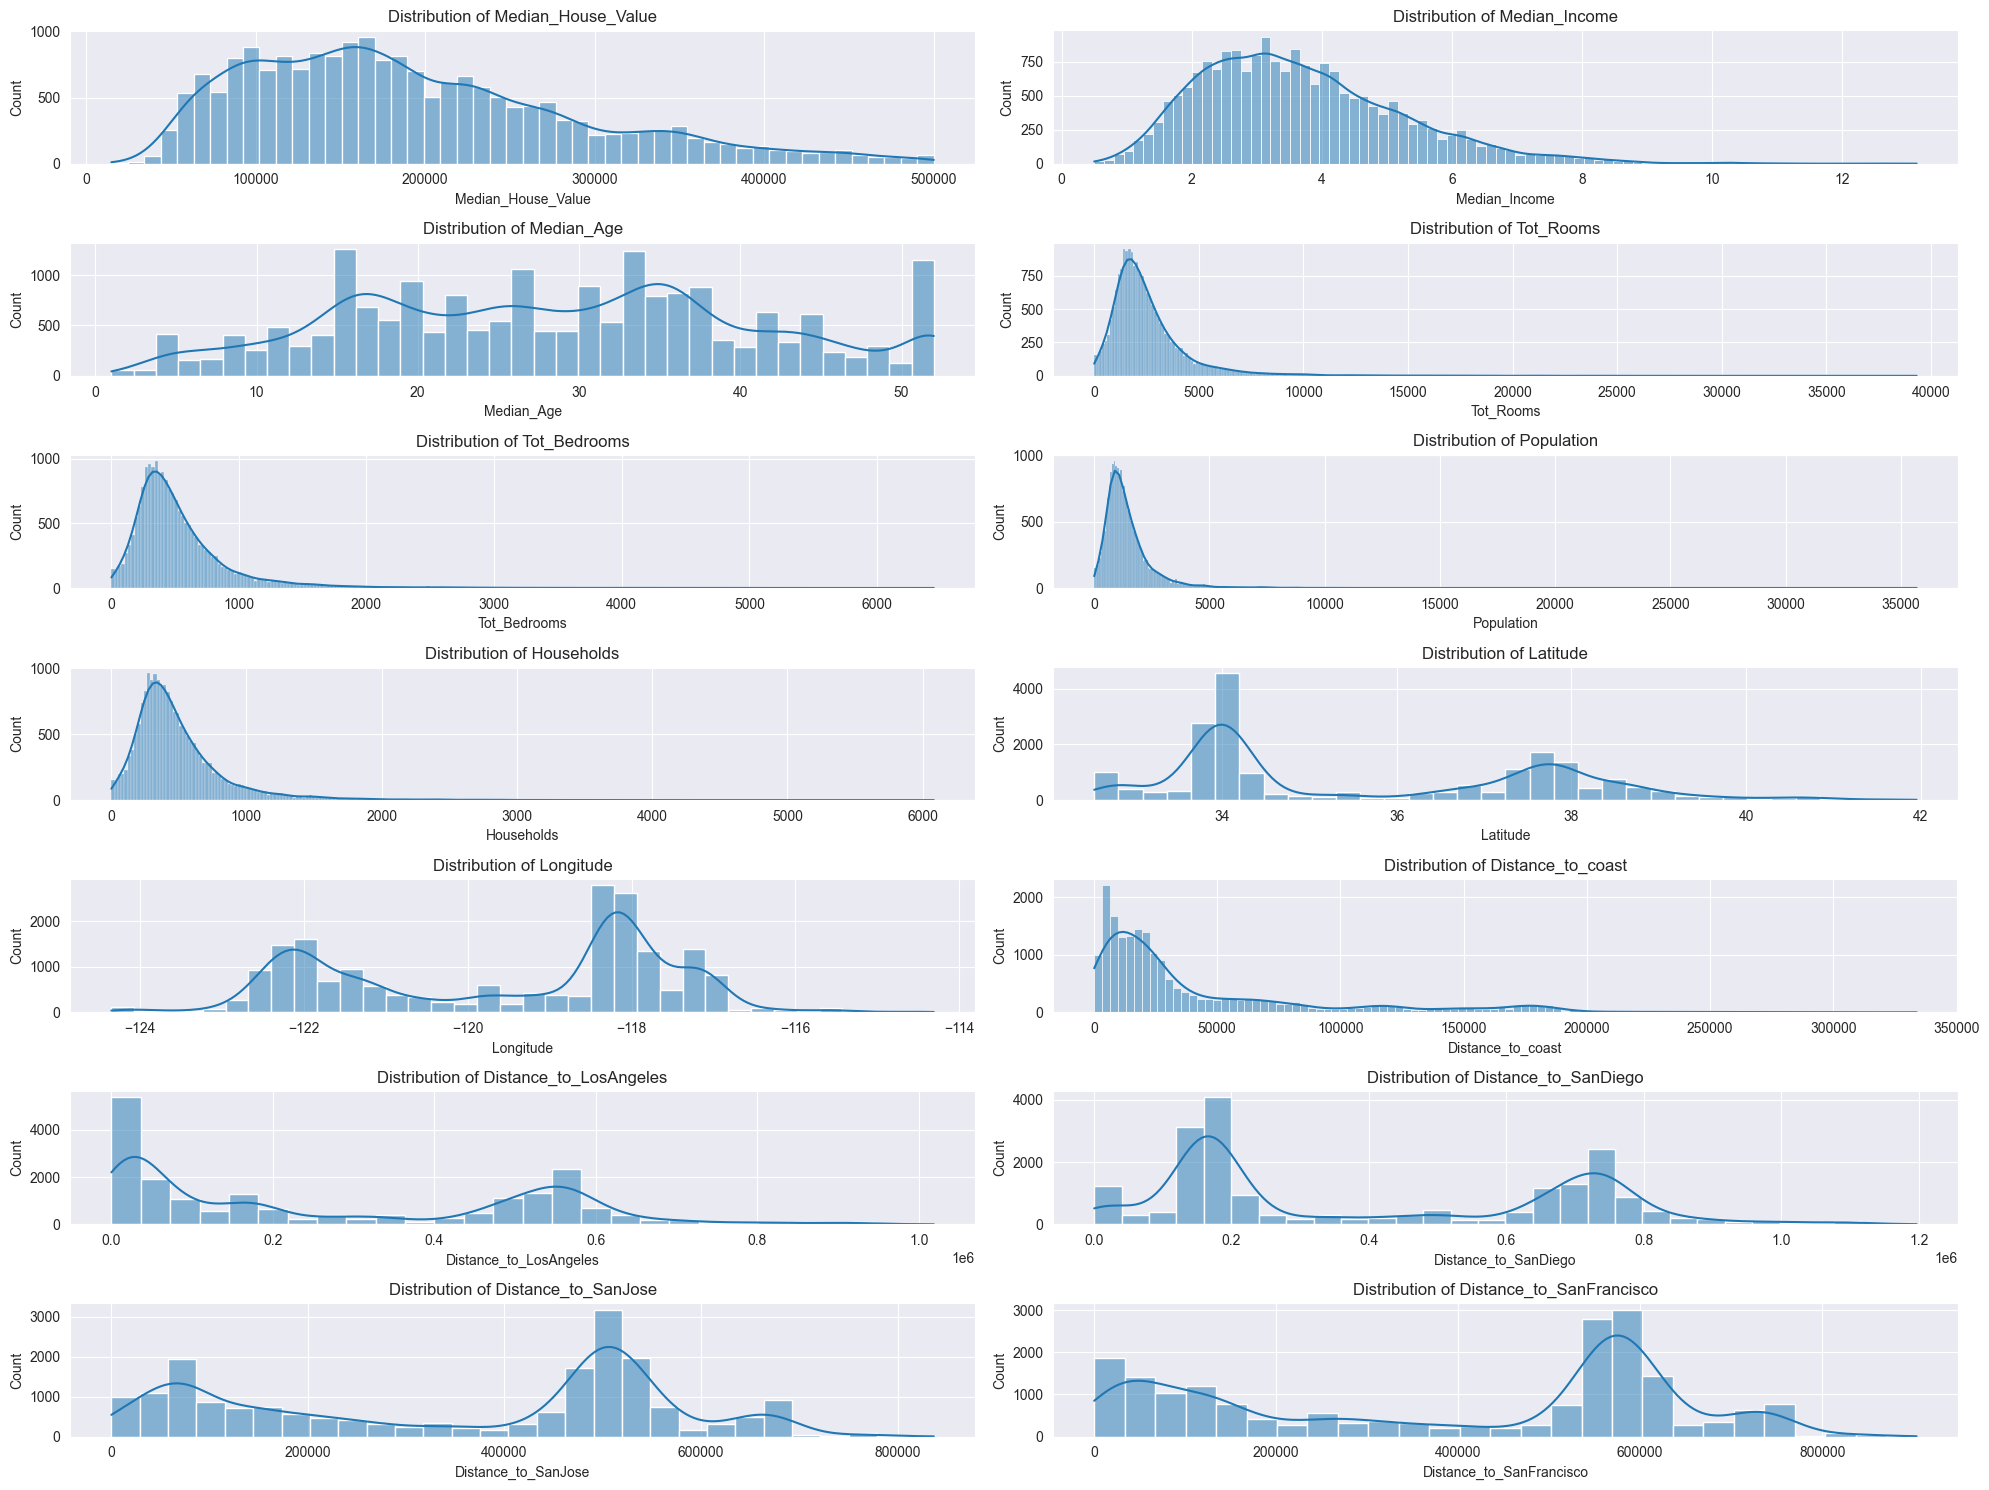

In [50]:
# Plot density plots for all variables in a single figure
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

If we take a look at the boxplot, for most of the columns we have a lot outliers using the IQR method. However, this is misleading as if we look at the density plots we can observe that we have multiple clusters at different value ranges. For example looking at `Median_House_Value`. 

Given that this is real data which makes sense in California in particular, there are people who have a very large income and can afford expensive housing. While conducting analysis and model building we can keep these in mind when considering the limitations of the analysis and the model.

### Correlation

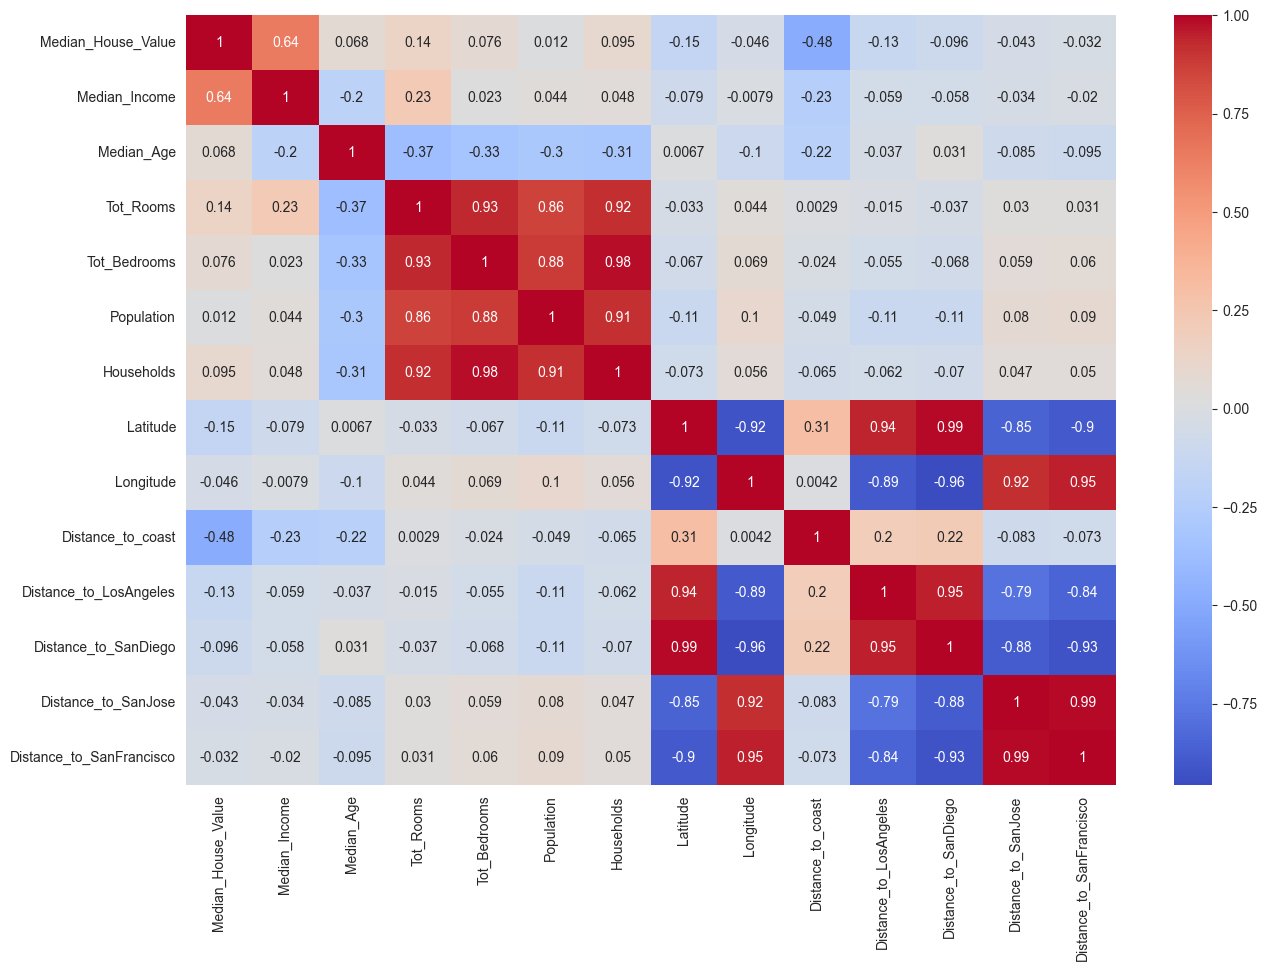

In [51]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

#### In the heatmap above, we can see that a lot of the variables are highly correlated.
- **Household, population, total rooms and total bedrooms** are highly correlated with each other. Therefore, we must do transform these columns to decrease multicollinearity. Linear regression perform poorly when multicollinearity is high, while the random forest is more robust and can handle multicollinearity better. As long as we do not lose information, we can still gain better prediction scores by transforming these highly correlated variables.

### Feature Engineering


In [52]:
# Extract the relevant columns
bedrooms_rooms = df[['Tot_Bedrooms', 'Tot_Rooms']]

# Standardize the data as PCA requires it
scaler = StandardScaler()
bedrooms_rooms_scaled = scaler.fit_transform(bedrooms_rooms)

# Apply PCA
pca = PCA(n_components=1)
principal_components = pca.fit_transform(bedrooms_rooms_scaled)

# Add the principal component back to the dataframe
df['Bedrooms_Rooms_block_PCA'] = principal_components

We combined `Tot_Bedrooms`, `Tot_Rooms` due to the fact that they are highly correlated.

In [53]:
df['Avg_Pop_Per_Household'] = df['Population'] / df['Households']
df.drop(columns=['Households', 'Tot_Bedrooms', 'Tot_Rooms'], inplace=True)

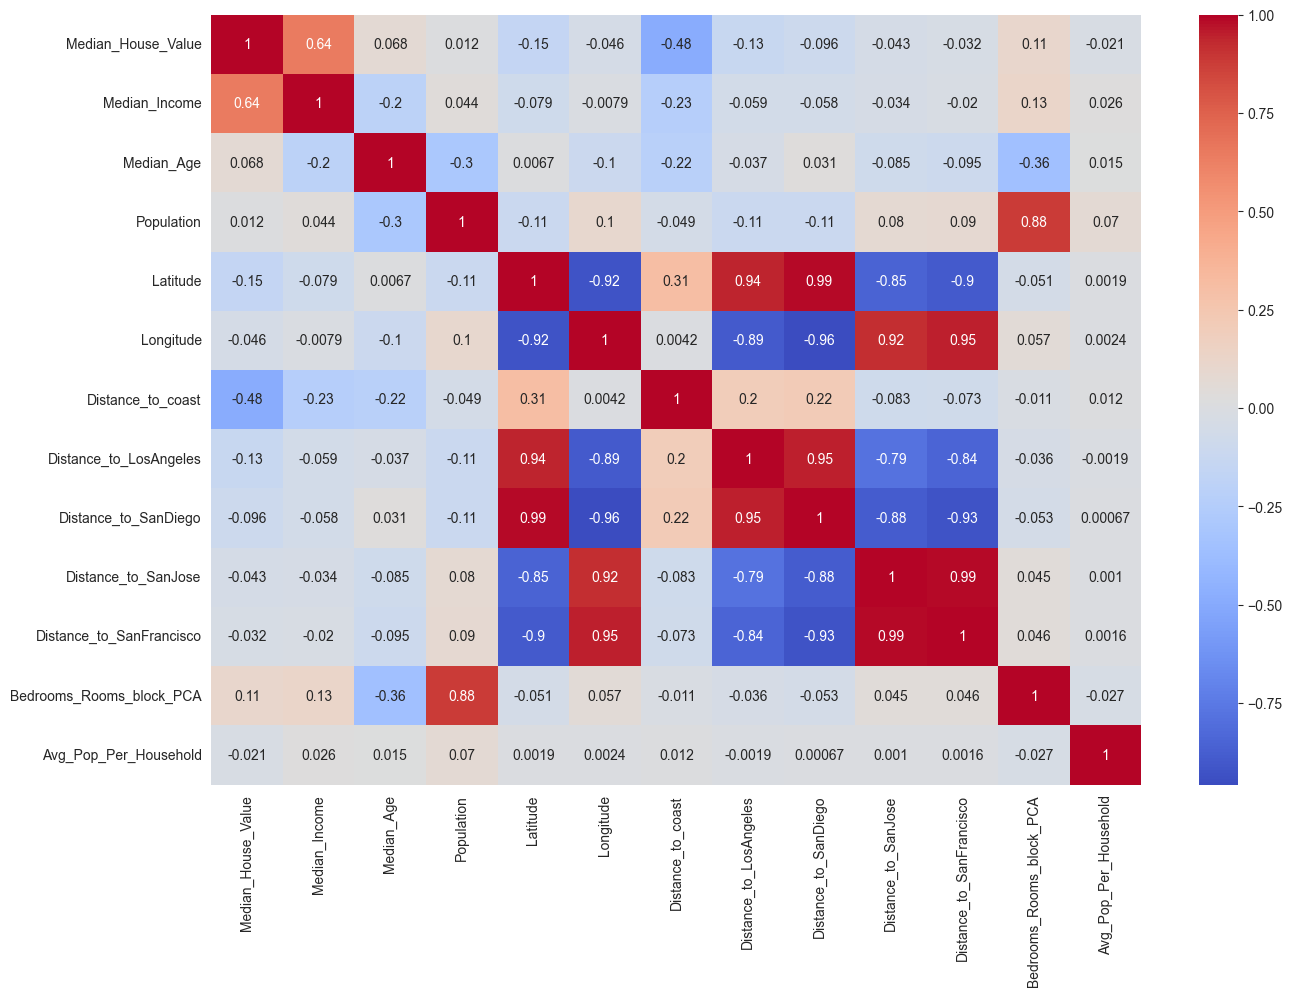

In [54]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Explanation of the new correlation matrix

We can see now that our previously highly correlated features, do not show as much multicollinearity anymore. The only question arises, does our PCA that incorporates number of bedrooms and total rooms, still has a significant relationship with house pricing. 

Moreover, we have a lot of high correlation between geographical variables, and this will be addressed in the later section where we engineer features that replace these.

### Understanding of geographical data

Below we have located the longitude and latitude of the cities in our dataframe. A visualization is made of all the locations of the houses that are in the dataset on a map.

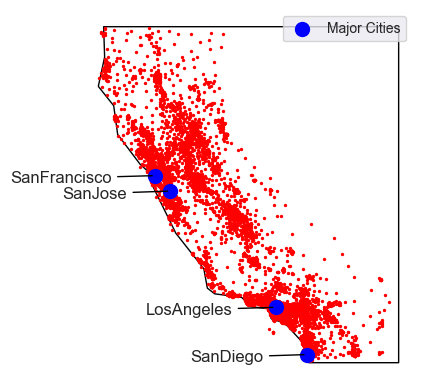

In [55]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)

world = gpd.read_file(get_path("naturalearth.land"))

# Create a DataFrame for the cities with their coordinates
gdf_cities = gpd.GeoDataFrame({
    'City': ['SanJose', 'SanFrancisco', 'LosAngeles', 'SanDiego'],
    'Latitude': [37.3382, 37.7749, 34.0522, 32.7157],
    'Longitude': [-121.8863, -122.4194, -118.2437, -117.1611]
}, geometry=gpd.points_from_xy([-121.8863, -122.4194, -118.2437, -117.1611], [37.3382, 37.7749, 34.0522, 32.7157]), crs="EPSG:4326")

# Plot the cities on the map
ax = world.clip([-130,32.5,-114,42]).plot(color="white", edgecolor="black")
gdf.plot(ax=ax, color="red", markersize=2)
gdf_cities.plot(ax=ax, color="blue", markersize=100, marker='o', label='Major Cities')

# Add labels for the cities with an offset to the left and a line connecting to the point
for x, y, label in zip(gdf_cities.geometry.x, gdf_cities.geometry.y, gdf_cities['City']):
    ax.annotate(label, xy=(x, y), xytext=(x - 1.5, y - 0.2),
                textcoords='data', fontsize=12, ha='right',
                arrowprops=dict(arrowstyle="-", color='black'))

ax.axis('off')
plt.legend(loc='upper right')
plt.legend()
plt.show()

### Transforming highly correlated location data

Each row of data has a distance to each city, this is very impractical. Therefore the data of distance to each city is transformed two variables, the closest major city where the house is located nearby to and what this city is. 

In [56]:
# Create new Closest City column for Los Angeles and San Francisco San Jose and San Diego using distance columns
df['Closest_Distance_to_city'] = df[[column for column in df.columns if column.startswith('Distance_')]].min(axis=1)

df['Closest_Distance_to_city'] = df[['Distance_to_LosAngeles', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']].min(axis=1)

# Assign the closest city to the Closest_City column
df['Closest_City'] = np.where(df['Distance_to_LosAngeles'] == df['Closest_Distance_to_city'], 'LosAngeles',
                     np.where(df['Distance_to_SanDiego'] == df['Closest_Distance_to_city'], 'SanDiego',
                     np.where(df['Distance_to_SanJose'] == df['Closest_Distance_to_city'], 'SanJose', 'SanFrancisco')))

# Drop the distance columns
df.drop(columns=['Distance_to_LosAngeles', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco'], inplace=True)

### New map visualization with newly engineered features  

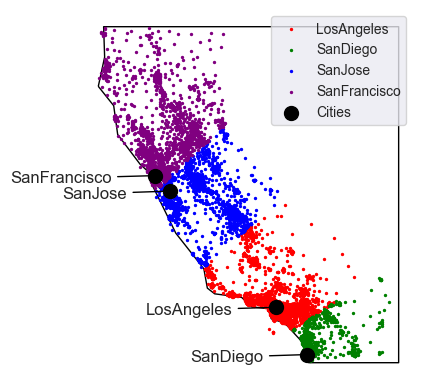

In [57]:
# Define colors for each city
colors = {'LosAngeles': 'red', 'SanDiego': 'green', 'SanJose': 'blue', 'SanFrancisco': 'purple'}

# Create a GeoDataFrame for the points with the closest city
gdf['Closest_City'] = df['Closest_City']

# Plot the world map restricted to California
ax = world.clip([-130, 32.5, -114, 42]).plot(color="white", edgecolor="black")

# Plot the points colored by the closest city
for city, color in colors.items():
    gdf[gdf['Closest_City'] == city].plot(ax=ax, color=color, markersize=2, label=city)

# Plot the cities on the map
gdf_cities.plot(ax=ax, color="black", markersize=100, marker='o', label='Cities')

# Add labels for the cities with an offset to the left and a line connecting to the point
for x, y, label in zip(gdf_cities.geometry.x, gdf_cities.geometry.y, gdf_cities['City']):
    ax.annotate(label, xy=(x, y), xytext=(x - 1.5, y - 0.2),
    textcoords='data', fontsize=12, ha='right',
    arrowprops=dict(arrowstyle="-", color='black'))

# Remove axes completely
ax.axis('off')

# Move the legend to the right
plt.legend(loc='upper right')
plt.show()

### Relating the data distribution to the closest city

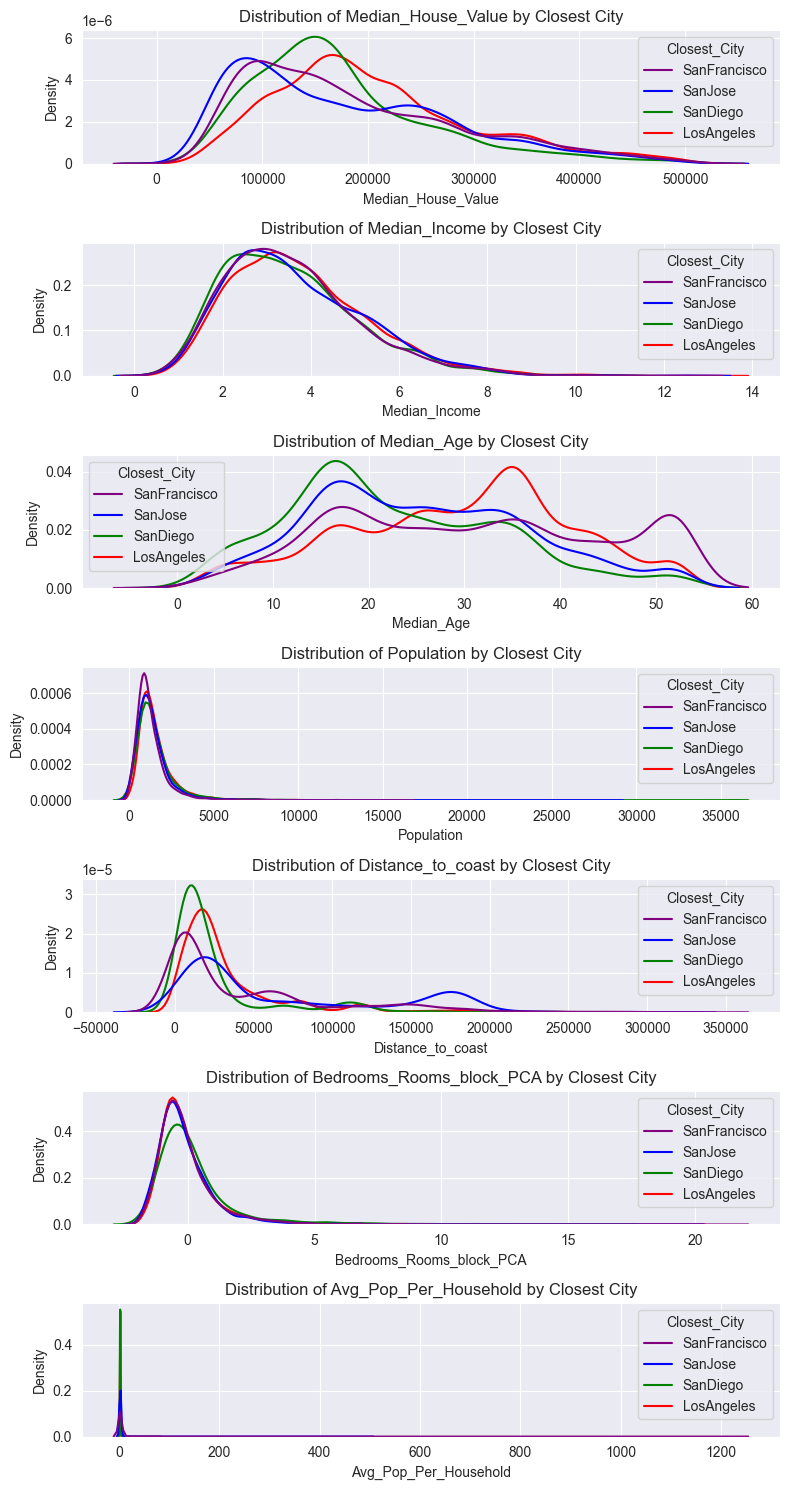

In [58]:
columns_to_plot = [col for col in df.columns if col not in ['Longitude', 'Latitude',
                                                            'Distance_to_LosAngeles', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco',
                                                            'Closest_Distance_to_city', 'Closest_City']]

fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 15))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.kdeplot(data=df, x=col, hue='Closest_City', common_norm=False, palette=colors, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Closest City')

plt.tight_layout()
plt.show()

From the plots above we can see how variables are distributed based on the engineered variable `Closest_City`. Most of them seem to follow a similar distribution regardless of the closest city, this is the case apart from Median_Age which has SanFranciso having people who are older, whilst SanDiego is younger.

### Normalization and scaling step

Previously, the number of rooms and bedrooms was transformed to a PCA, which requires a normalization step. It is still to be decided if normalization steps have to be taken for the rest of the data.

The cities are currently a categorical variable, which must be transformed to a dummy variable so that the model can make use of the data.

In [59]:
def transform_categorical_string_column_into_dummies(dataframe, column):
    if column not in dataframe:
        return dataframe
    onehot_df = pd.get_dummies(dataframe, columns=[column])
    return onehot_df

df = transform_categorical_string_column_into_dummies(df, "Closest_City")
df

,Median_House_Value,Median_Income,Median_Age,Population,Latitude,Longitude,Distance_to_coast,Bedrooms_Rooms_block_PCA,Avg_Pop_Per_Household,Closest_Distance_to_city,Closest_City_LosAngeles,Closest_City_SanDiego,Closest_City_SanFrancisco,Closest_City_SanJose
0,452600.0,8.3252,41,322,37.88,-122.23,9263.040773,-1.251902,2.555556,21250.213767,False,False,True,False
1,358500.0,8.3014,21,2401,37.86,-122.22,10225.733072,2.400179,2.109842,20880.600400,False,False,True,False
2,352100.0,7.2574,52,496,37.85,-122.24,8259.085109,-0.959463,2.802260,18811.487450,False,False,True,False
3,341300.0,5.6431,52,558,37.85,-122.25,7768.086571,-0.946674,2.547945,18031.047568,False,False,True,False
4,342200.0,3.8462,52,565,37.85,-122.25,7768.086571,-0.756886,2.181467,18031.047568,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,845,39.48,-121.09,162031.481121,-0.587160,2.560606,222619.890417,False,False,True,False
20636,77100.0,2.5568,18,356,39.49,-121.21,160445.433537,-1.276060,3.122807,218314.424634,False,False,True,False
20637,92300.0,1.7000,17,1007,39.43,-121.22,153754.341182,-0.210346,2.325635,212097.936232,False,False,True,False
20638,84700.0,1.8672,18,741,39.43,-121.32,152005.022239,-0.465336,2.123209,207923.199166,False,False,True,False


# Modelling

As mentioned before we will be comparing 2 models, therefore we must prepare the splits for modelling purposes.

We are also applying Normalization using the MinMaxScaler, as the data is not normally distributed.

In [60]:
# Select the features and target variable
X = df.drop(columns=["Median_House_Value", "Latitude", "Longitude"])
y = df['Median_House_Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                     random_state=17)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [61]:
# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test_scaled)

In [62]:
print("Linear Regression Metrics")
print("--------------------------------")
# Calculate RMSE
rmse_linear = root_mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error (RMSE): {rmse_linear}')

# Calculate RMSE on training set too to account for overfitting 
rmse_train_linear = root_mean_squared_error(y_train, linear_model.predict(X_train_scaled))
print(f'Root Mean Squared Error (RMSE) on training set: {rmse_train_linear}')

# Calculate MSE (We square the RMSE as mse func is deprecated)
mse_linear = rmse_linear**2
print(f'Mean Squared Error (MSE): {mse_linear}')

# Calculate MAE
mae_linear = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae_linear}')

# TODO: Calculate AIC and BIC? Replace the formulas with something better or find a source
n = len(y_test)
p = X_test.shape[1]

aic_linear = n * np.log(mse_linear) + 2 * p
bic_linear = n * np.log(mse_linear) + p * np.log(n)

print(f'Akaike Information Criterion (AIC): {aic_linear}')
print(f'Bayesian Information Criterion (BIC): {bic_linear}')

Linear Regression Metrics
--------------------------------
Root Mean Squared Error (RMSE): 63454.25859258333
Root Mean Squared Error (RMSE) on training set: 62946.20489266328
Mean Squared Error (MSE): 4026442933.534435
Mean Absolute Error (MAE): 47026.457941550194
Akaike Information Criterion (AIC): 87049.0470090448
Bayesian Information Criterion (BIC): 87118.10133681417


The `RMSE` is very similar for both the testing and training set. This is good news, as it proves that overfitting is not an issue in our LR model, at least from what we can discern from this metric comparison.

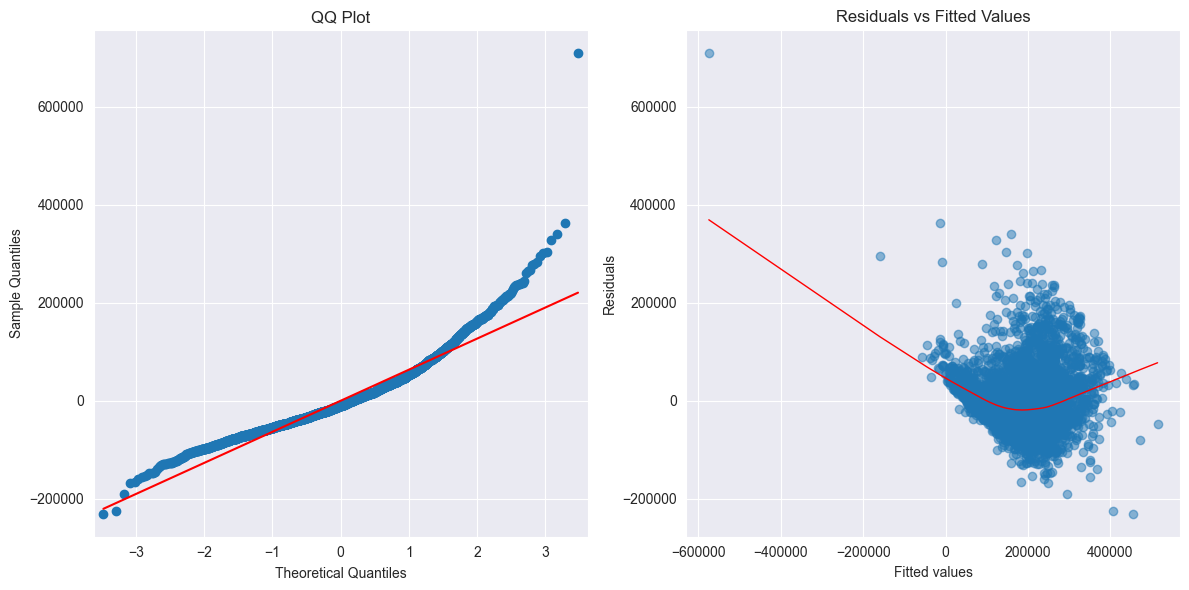

In [63]:
plt.figure(figsize=(12, 6)) 

# Generate QQ plot
plt.subplot(1, 2, 1)
sm.qqplot(y_test - y_pred, line='s', ax=plt.gca())
plt.title('QQ Plot')

# Generate residuals vs fitted values plot
plt.subplot(1, 2, 2)
sns.regplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red', 'lw': 1}, scatter_kws={'alpha': 0.5})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

plt.tight_layout()
plt.show()

From the plot above can see that OLS assumptions are not being met, namely that the residuals are not normally distributed. We theorise that this can be due to a non linear relationship. Therefore we will expect a non-linear model to work better.

We can also observe a large outlier that is pulling the residual vs fitted line.

### Random Forest Regressor

In [64]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

In [65]:
print("Random Forest Regressor Metrics")
print("--------------------------------")
# Calculate RMSE
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
print(f'Root Mean Squared Error (RMSE): {rmse_rf}')

# TODO: Calculate RMSE on training set too to account for overfitting (does it apply for random forests too?)
# https://stats.stackexchange.com/questions/56302/what-are-good-rmse-values
#rmse_train_rf = root_mean_squared_error(y_train, rf_model.predict(X_train_scaled))
#print(f'Root Mean Squared Error (RMSE) on training set: {rmse_train_rf}')

# Calculate MSE (We square the RMSE as mse func is deprecated)
mse_rf = rmse_rf**2
print(f'Mean Squared Error (MSE): {mse_rf}')

# Calculate MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error (MAE): {mae_rf}')

# TODO: Calculate AIC and BIC? 
aic_rf = n * np.log(mse_rf) + 2 * p
bic_rf = n * np.log(mse_rf) + p * np.log(n)

print(f'Akaike Information Criterion (AIC): {aic_rf}')
print(f'Bayesian Information Criterion (BIC): {bic_rf}')

Random Forest Regressor Metrics
--------------------------------
Root Mean Squared Error (RMSE): 48828.649907975494
Mean Squared Error (MSE): 2384237051.835635
Mean Absolute Error (MAE): 33048.78600762389
Akaike Information Criterion (AIC): 84987.09063678361
Bayesian Information Criterion (BIC): 85056.14496455298


## Evaluation

In this section we will discuss in more detail the results of both the models based on the metrics and select the model that works better whilst discussing the drawbacks that they have.

The metrics that we are using is as mentioned in the beginning RMSE for its integrability and penalization of big errors. We do not use that metric by itself however, we also use MSE (which penalizes errors even more severely).

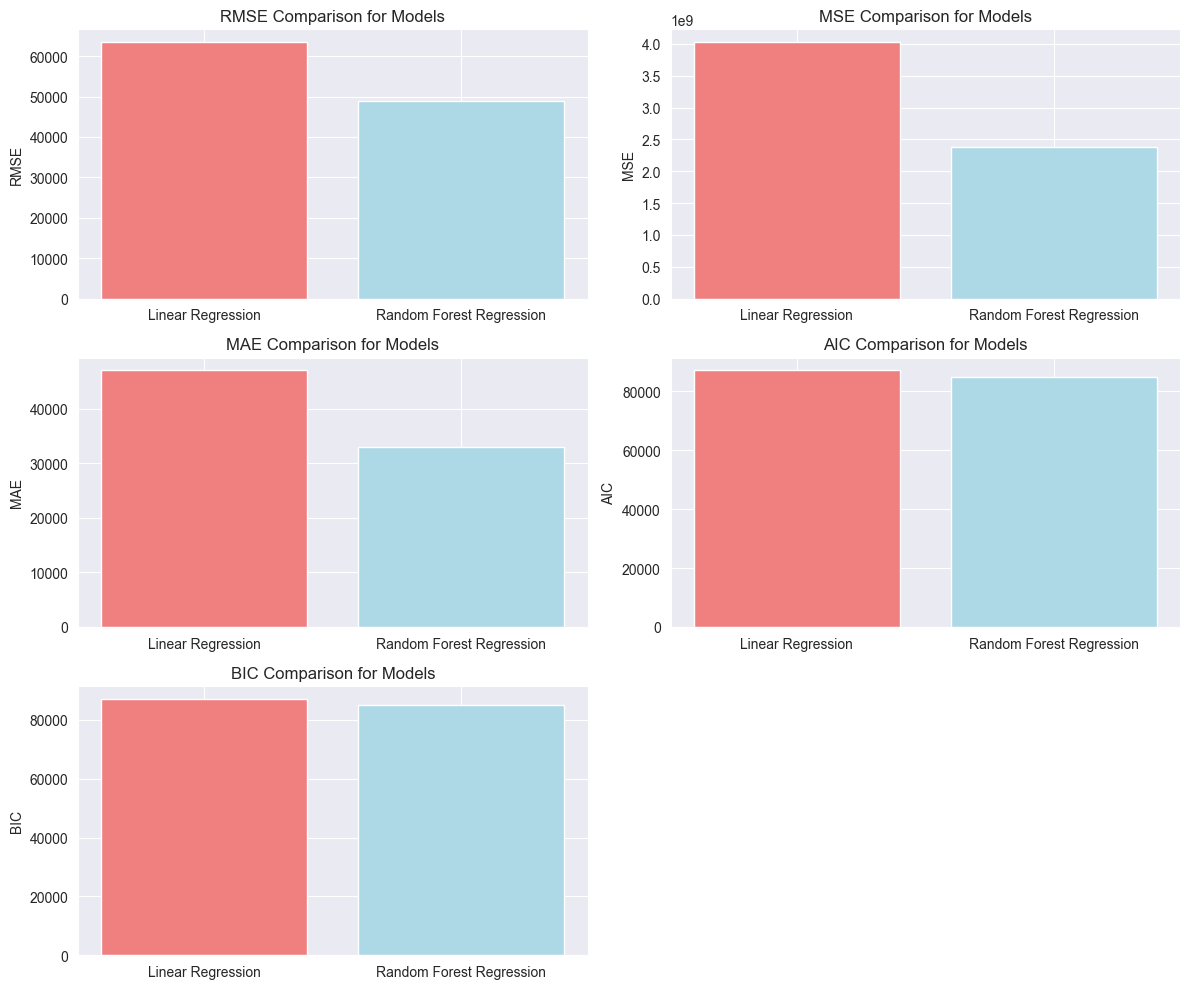

In [66]:
# Define the models and their metrics
models = ['Linear Regression', 'Random Forest Regression']
metrics = ['RMSE', 'MSE', 'MAE', 'AIC', 'BIC']

# Define the values for each metric
rmse_values = [rmse_linear, rmse_rf]
mse_values = [mse_linear, mse_rf]
mae_values = [mae_linear, mae_rf]
aic_values = [aic_linear, aic_rf]
bic_values = [bic_linear, bic_rf]

# Create a dictionary to hold the metric values
metric_values = {
    'RMSE': rmse_values,
    'MSE': mse_values,
    'MAE': mae_values,
    'AIC': aic_values,
    'BIC': bic_values
}

# Plot each metric
plt.figure(figsize=(12, 10))

for i, metric in enumerate(metrics):
    plt.subplot(3, 2, i + 1)
    plt.bar(models, metric_values[metric], color=['lightcoral', 'lightblue'])
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison for Models')

plt.tight_layout()
plt.show()

As we can see in the plots above, the Random Forest Regressor (RFR) has performed better than the Linear Regression (LR) model. We can see that the RFR model has a lower `RMSE` value as well as a higher R-squared value. Combining this with the fact that the LR model has already violated the OLS assumptions, we can conclude that the RFR is the better choice.

Expanding on this, the Random Forest model's predictions are on average `$50.000` off the actual values of the houses. Given the data we were dealing with, and comparing with other models developed by other researchers (Chen, 2024), this is a value to be reasonably satisfied with. In most papers using this dataset or a variation of it, the `RMSE` constantly surpasses the `$55.000 - $60.000` mark in various models. At the same time, however, it is true that not a lot of research has been done on the newest version of this dataset, which includes distance data. Regardless, there is reason to be optimistic about our prediction all things considered.



In [67]:
# Generate predictions for each tree in the Random Forest
all_tree_predictions = np.array([tree.predict(X_test_scaled) for tree in rf_model.estimators_])

# Calculate the prediction interval (e.g., 95% prediction interval)
lower_bound = np.percentile(all_tree_predictions, 2.5, axis=0)
upper_bound = np.percentile(all_tree_predictions, 97.5, axis=0)

# Calculate the percentage of the actual test data that falls within the interval
within_interval = np.mean((y_test >= lower_bound) & (y_test <= upper_bound)) * 100

print(f'Percentage of test data within the 95% prediction interval (RFR): {within_interval:.2f}%')

Percentage of test data within the 95% prediction interval (RFR): 93.01%


In [68]:
# Generate predictions for the linear regression model
y_pred_lr = linear_model.predict(X_test_scaled)

# Calculate the prediction intervals using np.percentile
lower_bound_lr = np.percentile(y_pred_lr, 2.5)
upper_bound_lr = np.percentile(y_pred_lr, 97.5)

# Calculate the percentage of the actual test data that falls within the interval
within_interval_lr = np.mean((y_test >= lower_bound_lr) & (y_test <= upper_bound_lr)) * 100

print(f'Percentage of test data within the 95% prediction interval (LR): {within_interval_lr:.2f}%')

Percentage of test data within the 95% prediction interval (LR): 90.37%


The reasoning behind computing the percentage of data within the confidence interval is to assess how reliable our model can be considered. It works as a supporting metric to the primary that is the `RMSE`. Looking at the already established preferred model, the Random Forest Regressor, we can observe that 92.83% of the testing data falls within the acceptable range, for a 95% confidence interval. This associates promising reliability and consistency with our RFR.

`todo:` Add hyper parameter tuning for random forest

In [69]:
model = RandomForestRegressor()
grid = {
    'n_estimators': [100, 200, 300],    # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],    # Maximum depth of the tree
}
grid_search = GridSearchCV(estimator=model, param_grid=grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X, y)
print("Best: %f using %s" %((-grid_result.best_score_), grid_result.best_params_))
means = -grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

NameError: name 'GridSearchCV' is not defined

## Conclusion & Recommendation

`TODO` WAIT FOR HYPERPARAMETER TUNING TO REWRITE MORE ACCURATE CONCLUSION

In this analysis, using the CRISP-DM framework, we managed to address the challenges of predicting median house prices in California's housing market in the decade of 1990. Our findings indicate that the Random Forest Regressor (RFR) outperformed our Linear Regression model, which faced its own fundamental issues anyway. Our primary evaluation metric, the `RMSE` resulted in `$48.715`, with 92.83% of predictions falling within a 95% confidence interval. Assessing both of these metrics is crucial in order to make informed decisions in such a complex market.

In terms of our stated business applications, our model enables real estate developers to identify, plan or repurpose housing developments by focusing on the predicted median house value, thus ensuring 50% of homes are priced below this number. This allows such developers to meet the affordability needs of the many Californians on waiting lists. So to keep balance, real estate agents can still maintain profitability by accommodating higher-income buyers (represented by the upper percentiles), our solution does not prevent such a thing.

All in all, our RFR constitutes a promising foundation toward modelling the median prices of housing in California. By eventually updating the model with current data, we could expand its relevance to today's market, continuing to aid both developers and families facing the housing challenges that are ongoing these days.

# Bibliography

Williams, A. K. (2000). The long wait: The critical shortage of housing in California. Housing California.

Chen, A. (2024). Deep Learning in Real Estate Prediction: An Empirical Study on California House Prices.